In [56]:
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# Read the csv
ver=pd.read_csv("/Users/shengyuchen/Dropbox/Engagement - Business/My Hub/AI:ML:DL Playground/Basics/Python Data Manipulations/Practical Data Analysis from Pandas/Loan payments data.csv")


In [4]:
ver.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [6]:
#melting data
melt=pd.melt(ver,id_vars="loan_status") #id var are explicitly named 
#variable var columns become the row values 
melt.head()

,loan_status,variable,value
0,PAIDOFF,Loan_ID,xqd20166231
1,PAIDOFF,Loan_ID,xqd20168902
2,PAIDOFF,Loan_ID,xqd20160003
3,PAIDOFF,Loan_ID,xqd20160004
4,PAIDOFF,Loan_ID,xqd20160005


In [7]:
melt.shape

(5000, 3)

In [8]:
ver.shape

(500, 11)

In [9]:
melt.loan_status.value_counts()

PAIDOFF               3000
COLLECTION_PAIDOFF    1000
COLLECTION            1000
Name: loan_status, dtype: int64

In [10]:
melt1=pd.melt(ver,value_vars="loan_status")
#Just specifying value var, id_var would work in both cases 
#the columns names specified in value_vars would get fixed. Only the column values
#should vary in the value column

In [11]:
melt1.head()

,variable,value
0,loan_status,PAIDOFF
1,loan_status,PAIDOFF
2,loan_status,PAIDOFF
3,loan_status,PAIDOFF
4,loan_status,PAIDOFF


In [13]:
melt1.variable.value_counts()

loan_status    500
Name: variable, dtype: int64

In [14]:
# Obtain the first five rows of melted data
melt.iloc[:5,:]

,loan_status,variable,value
0,PAIDOFF,Loan_ID,xqd20166231
1,PAIDOFF,Loan_ID,xqd20168902
2,PAIDOFF,Loan_ID,xqd20160003
3,PAIDOFF,Loan_ID,xqd20160004
4,PAIDOFF,Loan_ID,xqd20160005


In [15]:
# Returning the descriptive statistics of the dataset
ver.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [18]:
ver.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [21]:
# Crosstab of the data by specified columns 
# Holy shit this is like super useful 
pd.crosstab(ver.loan_status,ver.education)

education,Bechalor,High School or Below,Master or Above,college
loan_status,,,,
COLLECTION,11,49,1,39
COLLECTION_PAIDOFF,15,37,0,48
PAIDOFF,41,123,3,133


In [22]:
ver.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [24]:
# Return a subset of data
ver_sub=ver[(ver.age>30) & (ver.terms>=10)]
ver_sub.shape

(221, 11)

In [28]:
# Query the data
# What's the difference between this query of the data and the direct bollean
# Expression
ver_qry=ver.query('(terms==30)&(age<20)')
ver_qry.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
245,xqd20160246,PAIDOFF,1000,30,9/13/2016,10/12/2016,10/12/2016 23:00,NaN,19,High School or Below,female
259,xqd20160260,PAIDOFF,1000,30,9/13/2016,10/12/2016,10/12/2016 9:00,NaN,19,High School or Below,male
371,xqd20160372,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,18,college,male


In [29]:
ver_qry.shape

(3, 11)

In [36]:
ver.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [63]:
y

,Principal
0,1000
1,1000
2,1000
3,1000
4,1000
5,300
6,1000
7,1000
8,1000
9,800


[]

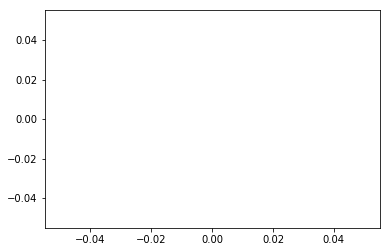

In [65]:
y=pd.DataFrame(ver.Principal)
plt.plot(x=y.index,y=y,marker=".ko")

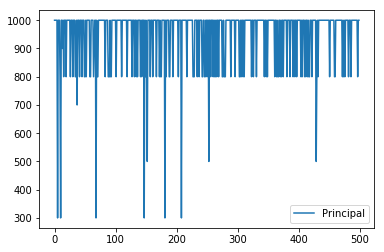

In [59]:
pd.DataFrame(ver.Principal).plot()

In [43]:
import matplotlib.pyplot as plt
ver.Principal.describe()

count     500.000000
mean      943.200000
std       115.240274
min       300.000000
25%      1000.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: Principal, dtype: float64

In [47]:
# Group data and obtain the mean
grouped1=ver.groupby(["Gender","education"]).mean()
grouped1

Principal      terms  past_due_days        age
Gender education                                                            
female Bechalor              953.846154  18.923077       2.000000  33.307692
       High School or Below  948.387097  23.709677      39.083333  32.903226
       college               939.393939  23.151515      24.181818  30.363636
male   Bechalor              942.592593  22.074074      34.960000  31.851852
       High School or Below  951.685393  23.617978      39.486486  31.112360
       Master or Above       600.000000  11.000000      74.000000  40.250000
       college               941.711230  22.604278      34.144737  30.395722

In [67]:
# View the number of rows and columns
grouped1.shape

(7, 4)

In [69]:
# Check a boolean condition
# Check across all columns, any 
(ver.loc[:"age"]>9000).any()

Loan_ID            True
loan_status        True
Principal         False
terms             False
effective_date     True
due_date           True
paid_off_time      True
past_due_days     False
age               False
education          True
Gender             True
dtype: bool

In [70]:
# Get descriptive statistics for a specified column
ver.loan_status.describe()

count         500
unique          3
top       PAIDOFF
freq          300
Name: loan_status, dtype: object

In [71]:
ver.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [73]:
# Group data and obtain the mean values
grpagg=ver.groupby("terms").aggregate(np.mean)
grpagg

,Principal,past_due_days,age
terms,,,
7,752.380952,2.000000,29.571429
15,893.719807,40.387500,31.937198
30,995.588235,33.352941,30.610294


In [75]:
# Group data and get the sums
grpsum=ver.groupby("terms").aggregate(np.sum)
grpsum

,Principal,past_due_days,age
terms,,,
7,15800,2.0,621
15,185000,3231.0,6611
30,270800,3969.0,8326


In [76]:
ver.groupby("terms").sum()
# why use aggregate 

,Principal,past_due_days,age
terms,,,
7,15800,2.0,621
15,185000,3231.0,6611
30,270800,3969.0,8326


In [77]:
# Return boolean values for a specified criteria
criterion=ver["Loan_ID"].map(lambda x:x.startswith("W"))
criterion.head()

0    False
1    False
2    False
3    False
4    False
Name: Loan_ID, dtype: bool